In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Указываем среднее значение, среднеквадратическое отклонение и количество сэмплов

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Указываем значение random seed в той же ячейке, что и вызов метода random - 
    # это нужно для того, чтобы получить те же самые данные
    # Мы используем значение 42 (42 это число из комедийного сериала Автостопом по Галактике - 
    # Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

<Axes: >

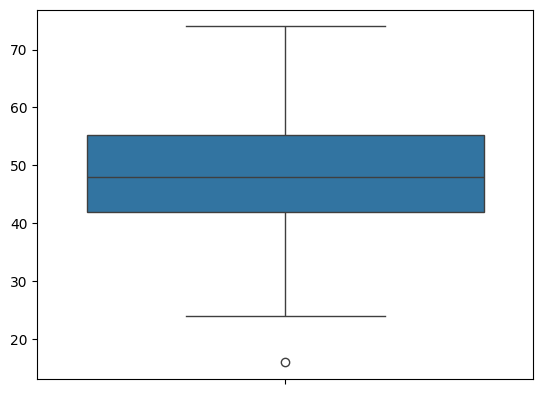

In [5]:
sns.boxplot(sample)

In [7]:
df = pd.Series(data=sample)
df.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [8]:
IQR = 55.25000 - 42.00000
lower_limit = 42.00000 - 1.5*IQR
lower_limit

22.125

In [9]:
df[df >= lower_limit] # убрали выброс из данных

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [10]:
np.percentile(sample, [75]) # получение значений программно, не вручную

array([55.25])